# DS-SF-32 | Homework 02: The `pandas` Library

In this homework, we will be exploring the `police shootings` dataset using `pandas`.

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:

killings = pd.read_csv('/Users/melaniequalls/Desktop/DataScienceGA/DS-SF-32/dataset/police-killings.csv')
killings.shape

(467, 15)

#### A) Starter question: Display a few lines of the dataset to the screen.

In [79]:
killings.head(3)

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930


In [80]:
killings = killings.rename(columns = {'lawenforcementagency':'agency'})
killings.head(3)

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930



#### 2. Show the count of missing values in each column


In [81]:
killings.shape[0] - killings.count()

Unnamed: 0       0
name             0
age              0
gender           0
raceethnicity    0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

#### 3. replace each null value in the dataframe with the string "Unknown"

In [102]:
killings.replace(np.nan, 'Unknown')

killings['streetaddress'].isnull().any()
# wtf, I dunno why it's not replacing

True

#### 4. How many killings were there so far in 2015?

In [109]:
killings.shape[0]

467

#### 5. Of all killings, how many were male and how many female?

In [123]:
#killings[killings.gender == 'Female'].count()

#the above showed summary with count of 22 in each row.  How to only show one of these rows?
len(killings[killings.gender == 'Female'])

22

#### 6. How many killings were of unarmed people?


In [125]:
len(killings[killings.armed == 'No'])

102

#### 7. What percentage of all killings were unarmed?


In [127]:
len(killings[killings.armed != 'No'])

365

#### 8. What are the 5 states with the most killings?


In [144]:
killings.state.value_counts().nlargest(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

#### 9. Show a value counts of deaths for each race


In [145]:
killings.raceethnicity.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

#### 10. Display a histogram of ages of all killings


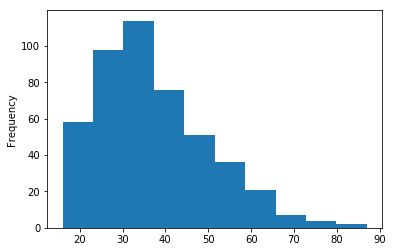

In [154]:

killings.age.plot.hist()

#### 11. Show 6 histograms of ages by race


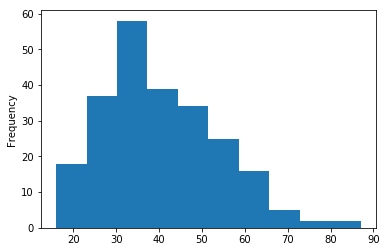

In [159]:
killings[killings.raceethnicity == 'White'].age.plot.hist()


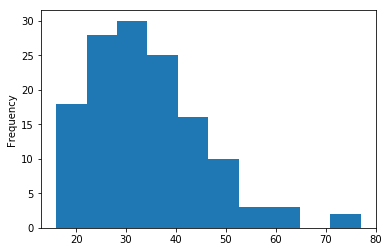

In [160]:
killings[killings.raceethnicity == 'Black'].age.plot.hist()


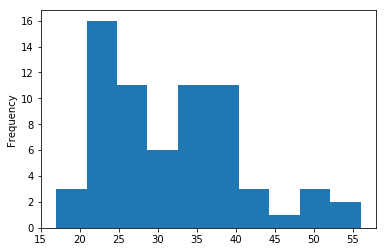

In [161]:
killings[killings.raceethnicity == 'Hispanic/Latino'].age.plot.hist()


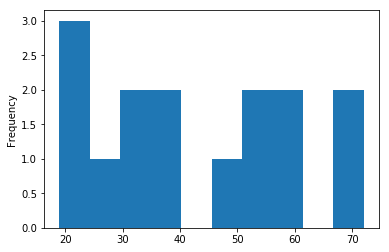

In [162]:
killings[killings.raceethnicity == 'Unknown'].age.plot.hist()

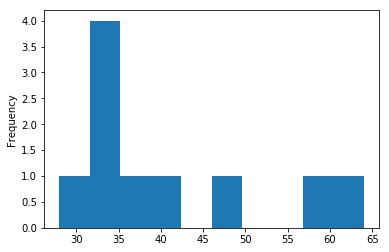

In [163]:
killings[killings.raceethnicity == 'Asian/Pacific Islander'].age.plot.hist()

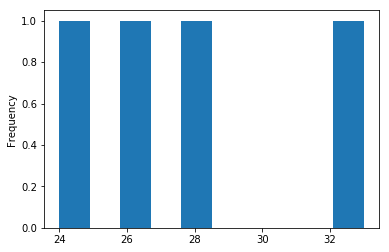

In [164]:
killings[killings.raceethnicity == 'Native American'].age.plot.hist()

#### 12. What is the average age of death by race?


In [181]:
byGroup = killings.groupby('raceethnicity')
byGroup['age'].mean()

raceethnicity
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

#### 13. Show a bar chart with counts of deaths every month


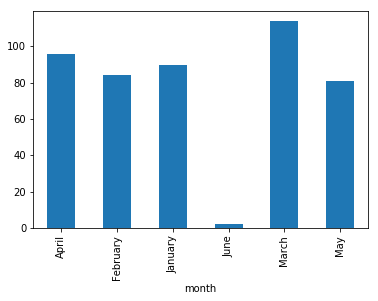

In [210]:
byMonth = killings.groupby('month')
countByMonth = byMonth['month'].count()

countByMonth.plot(kind='bar')
# don't know how to sort the months